In [1]:
import sys
import os

# notebooks/ から見た src のパスを追加
sys.path.append(os.path.abspath("../src"))

# 自作パッケージを import
from sim_utils import *

In [2]:
# optimizerの準備
# モデル・データ読み込み
model = get_simple_arm(dof=3)  # 自分のURDFを読み込むなら buildModelFromUrdf
data = model.createData()
agent = None
time_steps = 100
dt = 0.05

# エンドエフェクタのframe名とid
frame_name = "ee_link"
frame_id = model.getFrameId(frame_name)
# 目標位置と姿勢の計算（SE3）
theta = np.pi/4
Rs = pin.utils.rotate("y", -3*theta)
start_placement = pin.SE3(Rs, np.array([-2, 0, 0]))
Re = pin.utils.rotate("y", 3*theta)
end_placement = pin.SE3(Re, np.array([2, 0, 0]))
start = ik_se3_solver(model, data, frame_id, start_placement)
end = ik_se3_solver(model, data, frame_id, end_placement)

# 関節角の制限
limits = same_limits(model.nq)
# 最適化のパラメータ
num_knots = 5
n_particles = 100


opt = Optimizer(model, agent, time_steps, dt, start, end, limits, num_knots)
best_cost, best_particle, best_qs = opt.optimize(torque_change=1.0, iters=2)


2025-10-09 05:13:54,513 - pyswarms.single.global_best - INFO - Optimize for 2 iters with {'c1': 1.5, 'c2': 1.5, 'w': 0.9}


URDFファイルを ./robots/simple_arm_dof3.urdf に保存しました。自由度: 3
URDFファイルを ./robots/simple_arm_dof3.urdf に保存しました。自由度: 3
収束しました！ iteration: 23
収束しました！ iteration: 23


pyswarms.single.global_best:   0%|          |0/2INFO:2025-10-09 05:13:55,595:jax._src.xla_bridge:752: Unable to initialize backend 'tpu': INTERNAL: Failed to open libtpu.so: libtpu.so: cannot open shared object file: No such file or directory
2025-10-09 05:13:55,595 - jax._src.xla_bridge - INFO - Unable to initialize backend 'tpu': INTERNAL: Failed to open libtpu.so: libtpu.so: cannot open shared object file: No such file or directory
pyswarms.single.global_best: 100%|██████████|2/2, best_cost=3.81e+3
2025-10-09 05:13:56,228 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 3810.386962890625, best pos: [0.68194357 1.1410628  0.70132366 0.42165454 1.19472292 1.07118083
 0.54616025 0.80156766 1.07525658]


2025-10-09 05:16:11,953 - matplotlib.animation - INFO - Animation.save using <class 'matplotlib.animation.PillowWriter'>


saving as './tmp_movies/sample.gif'...
saved as sample


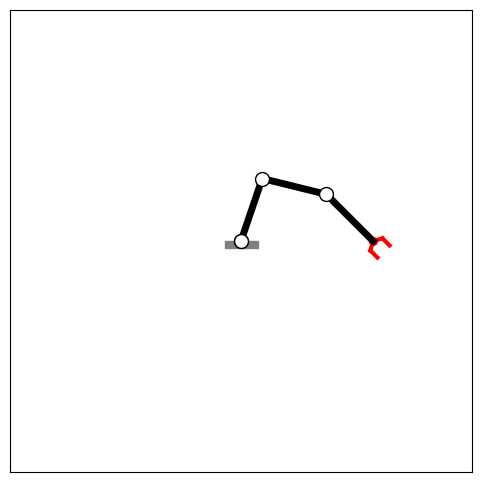

In [4]:
scope = {'x': (-3.5, 3.5), 'y': (-3.5, 3.5)}
plot_robot_motion(model, best_qs, dt, detail=False, gripper_size=0.3, grid=False, scope=scope,movie='sample' )